In [1]:
import os

using_colab = False
if using_colab:
  os.system('rm -rf ./*')
  os.system('git clone https://github.com/gasparyanartur/radio-optimizer.git')
  os.system('mv radio-optimizer/* ./')
  os.system('rm -rf radio-optimizer')

EFIM
[[  2636.47658135   -898.98146586   4625.09226413 -14790.42549925]
 [  -898.98146586    306.5332276   -1577.0563838    5043.21505834]
 [  4625.09226413  -1577.0563838    8113.6614689  -25946.40249937]
 [-14790.42549925   5043.21505834 -25946.40249937  82973.11950224]]
CRLB
[[ 3.79294095e-04 -1.11236999e-03  2.16211903e-04 -6.76113071e-05]
 [-1.11236999e-03  3.26228908e-03 -6.34092738e-04  1.98286210e-04]
 [ 2.16211903e-04 -6.34092738e-04  1.23248918e-04 -3.85409885e-05]
 [-6.76113071e-05  1.98286210e-04 -3.85409885e-05  1.20520960e-05]]


{'seed': 1,
 'syn_type': <SynType.Asyn: 2>,
 'link_type': <LinkType.Uplink: 1>,
 'beam_type': <BeamType.Random: 1>,
 'ris_profile_type': <RisProfileType.Random: 1>,
 'beamforming_angle_std': 0,
 'array_type': <ArrayType.Analog: 1>,
 'radio_directional': 1,
 'UE_radiation': <RadiationType.Omni: 1>,
 'RIS_radiation': <RadiationType.Omni: 1>,
 'BS_radiation': <RadiationType.Omni: 1>,
 'c': 300000000.0,
 'fc': 28000000000.0,
 'lambdac': 0.010714285714285714,
 'BW': 400000000.0,
 'P': 31.622776601683793,
 'beta': 30,
 'K': 64,
 'T': 0.001,
 'PB': array([[0],
        [0],
        [0]]),
 'OB': array([[45],
        [ 0],
        [ 0]]),
 'PU': array([[-2. ],
        [ 3. ],
        [-1.5]]),
 'OU': array([[0],
        [0],
        [0]]),
 'VU': array([[0],
        [0],
        [0]]),
 'PR': array([[-5.01, -1.  ,  5.01],
        [ 2.  ,  5.01,  2.5 ],
        [ 0.5 ,  0.5 ,  0.5 ]]),
 'OR': array([[  0, -90, 180],
        [  0,   0,   0],
        [  0,   0,   0]]),
 'VR': array([[0],
        [

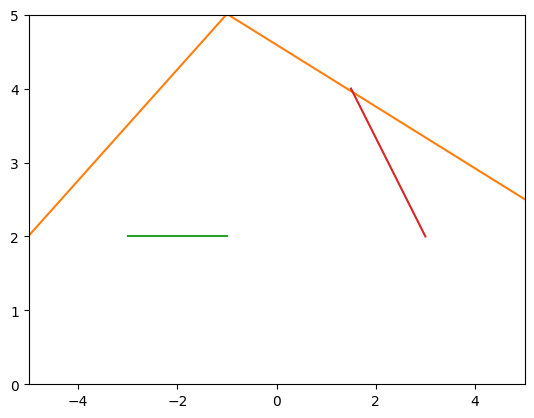

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from src.utils import db2pow

from src.channel_mmWave_parameters import ChannelmmWaveParameters

c = ChannelmmWaveParameters(
    OB = np.array([45, 0, 0]).reshape(-1, 1),
    NB_dim = np.array([1, 1]).reshape(-1, 1),
    PR = np.array([[-5.01, 2, 0.5], [-1, 5.01, 0.5], [5.01, 2.5, 0.5]]).T,
    OR = np.array([[0, 0, 0], [-90, 0, 0], [180, 0, 0]]).T,
    NR_dim = np.array([[10, 10], [10, 10], [10, 10]]).T,
    PU = np.array([-2, 3, -1.5]).reshape(-1, 1),
    OU = np.array([0, 0, 0]).reshape(-1, 1),
    NU_dim = np.array([1, 1]).reshape(-1, 1),
    P = db2pow(15),
    K = 64,
    G = 10,

    seed=1
)

c.get_beam_matrix()
c.get_tx_symbol()
c.get_path_parameters_PWM()
c.get_FIM_PWM()

fim = c.FIM
c.get_crlb_from_fim_PWM(fim)

#c.Anchor = np.vstack((c.PB[:2], c.PR[:2])).T
c.Wall = [np.array([[-3, 2], [-1, 2]]), np.array([[3, 2], [1.5, 4]])]

plt.plot(c.PB[0], c.PB[1])
plt.plot(c.PR[0], c.PR[1])
plt.plot(c.Wall[0][:, 0], c.Wall[0][:, 1])
plt.plot(c.Wall[1][:, 0], c.Wall[1][:, 1])
plt.xlim(-5, 5)
plt.ylim(0, 5)


c.__dict__


In [4]:
c.thetaRU_loc[:, 2]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
c.lambdak

In [5]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [2]:
import numpy as np
np.random.seed(1)
from src.utils import rand

rand(2, 1)

array([[0.417022  ],
       [0.72032449]])